# Corporate Profitability Analysis and Projection

## Project Overview
This project analyzes financial data from publicly listed companies on the New York Stock Exchange to identify highly profitable firms and generate three-year profit projections. The results are used to provide high-level investment insights based on historical performance trends..

## Problem Statement
The objective is to identify the most profitable companies based on historical average profit and growth trends. Using these patterns, optimistic, pessimistic, and average profit projections are generated for the next three years to support comparative investment recommendations.


## Data
The dataset was sourced from Kaggle and contains key financial metrics for companies listed on the New York Stock Exchange, including revenue, profit, and other firm-level financial indicators.

## Exploratory Data Analysis

In [ ]:
#Read the Corporate Financial Data file
import pandas as pd

df = pd.read_csv("/content/Corporate Financial Dataset.csv")

df.head()


,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,12/31/2012,3.068000e+09,-222000000,-1961000000,23,-1888000000,4.695000e+09,53.0,1.330000e+09,...,7.072000e+09,9011000000,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,AAL,12/31/2013,4.975000e+09,-93000000,-2723000000,67,-3114000000,1.059200e+10,75.0,2.175000e+09,...,1.432300e+10,13806000000,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,AAL,12/31/2014,4.668000e+09,-160000000,-150000000,143,-5311000000,1.513500e+10,60.0,1.768000e+09,...,1.175000e+10,13404000000,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,AAL,12/31/2015,5.102000e+09,352000000,-708000000,135,-6151000000,1.159100e+10,51.0,1.085000e+09,...,9.985000e+09,13605000000,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,AAP,12/29/2012,2.409453e+09,-89482000,600000,32,-271182000,5.202150e+08,23.0,5.981110e+08,...,3.184200e+09,2559638000,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


It is necessary to create a year column to specifically analyze trends by year.

In [ ]:
#Create year column
pd.to_datetime(df["Period Ending"])
df["Year"] = pd.to_datetime(df["Period Ending"]).dt.year

In [ ]:
 #Find the top five companies by  Average Net Income (Profit)
Top_5 = df.groupby("Ticker Symbol")["Net Income"].mean().sort_values(ascending=False).head(5)
Top_5

,Net Income
Ticker Symbol,
AAPL,4.390700e+10
XOM,3.153250e+10
WFC,2.168150e+10
JPM,2.133925e+10
MSFT,1.823200e+10


The companies with the highest average net income (profit) are Apple (AAPL), Exxon Mobile (XOM), Wells Fargo (WFC), JPMorgan (JPM), and Microsoft. Let's graph the results.

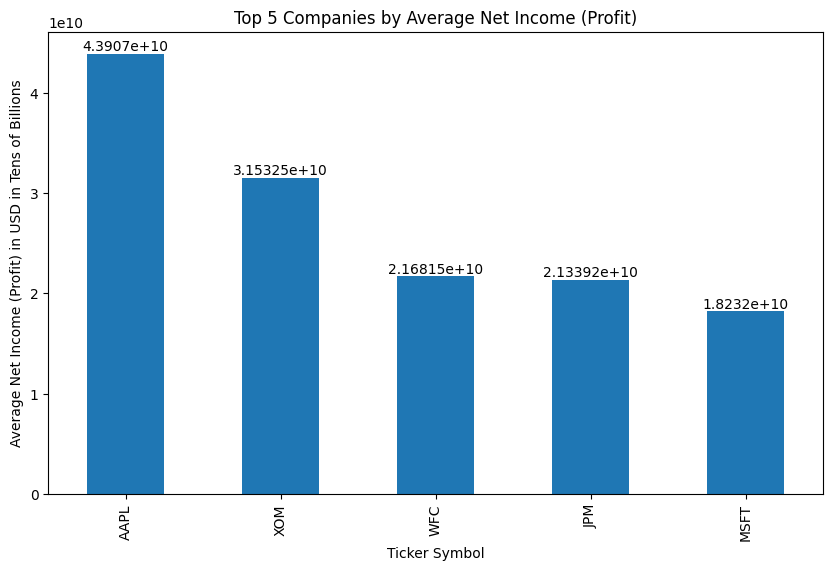

In [ ]:
#Graph the results
import matplotlib.pyplot as plt
ax = Top_5.plot(kind="bar", figsize=(10, 6))
# Add labels
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel("Ticker Symbol")
plt.ylabel("Average Net Income (Profit) in USD in Tens of Billions")
plt.title("Top 5 Companies by Average Net Income (Profit)")
plt.show()

It is time to find the slope or average rate of change of the profits of these companies to see which ones are trending upward or downward.

In [ ]:
#Find slopes
AAPL_slope = (df[df["Ticker Symbol"] == "AAPL"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "AAPL"]["Net Income"].iloc[0])/3
XOM_slope = (df[df["Ticker Symbol"] == "XOM"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "XOM"]["Net Income"].iloc[0])/3
WFC_slope = (df[df["Ticker Symbol"] == "WFC"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "WFC"]["Net Income"].iloc[0])/3
JPM_slope = (df[df["Ticker Symbol"] == "JPM"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "JPM"]["Net Income"].iloc[0])/3
MSFT_slope = (df[df["Ticker Symbol"] == "MSFT"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "MSFT"]["Net Income"].iloc[0])/3
tickers = Top_5.index.tolist()
slope_df = pd.DataFrame({"Ticker Symbol":tickers,
                         "Slope": [AAPL_slope, XOM_slope,WFC_slope,JPM_slope,MSFT_slope]})
slope_df.sort_values(by="Slope", ascending=False)

,Ticker Symbol,Slope
0,AAPL,2.883333e+09
2,WFC,1.332333e+09
3,JPM,1.052667e+09
4,MSFT,-1.688333e+09
1,XOM,-9.576667e+09


Exxon Mobil and Microsoft are trending downward so they should be dropped. Let's do the top 10 now to see if we can find more positively trending companies.

In [ ]:
 #Find the top ten companies by  Average Net Income (Profit)
Top_10 = df.groupby("Ticker Symbol")["Net Income"].mean().sort_values(ascending=False).head(10)
Top_10

,Net Income
Ticker Symbol,
AAPL,4.390700e+10
XOM,3.153250e+10
WFC,2.168150e+10
JPM,2.133925e+10
MSFT,1.823200e+10
CVX,1.785750e+10
WMT,1.601950e+10
IBM,1.457475e+10
PFE,1.316700e+10


In [ ]:
#Find slopes
AAPL_slope = (df[df["Ticker Symbol"] == "AAPL"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "AAPL"]["Net Income"].iloc[0])/3
XOM_slope = (df[df["Ticker Symbol"] == "XOM"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "XOM"]["Net Income"].iloc[0])/3
WFC_slope = (df[df["Ticker Symbol"] == "WFC"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "WFC"]["Net Income"].iloc[0])/3
JPM_slope = (df[df["Ticker Symbol"] == "JPM"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "JPM"]["Net Income"].iloc[0])/3
MSFT_slope = (df[df["Ticker Symbol"] == "MSFT"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "MSFT"]["Net Income"].iloc[0])/3
CVX_slope = (df[df["Ticker Symbol"] == "CVX"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "CVX"]["Net Income"].iloc[0])/3
WMT_slope = (df[df["Ticker Symbol"] == "WMT"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "WMT"]["Net Income"].iloc[0])/3
IBM_slope = (df[df["Ticker Symbol"] == "IBM"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "IBM"]["Net Income"].iloc[0])/3
PFE_slope = (df[df["Ticker Symbol"] == "PFE"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "PFE"]["Net Income"].iloc[0])/3
C_slope = (df[df["Ticker Symbol"] == "C"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "C"]["Net Income"].iloc[0])/3
tickers = Top_10.index.tolist()
slope_df = pd.DataFrame({"Ticker Symbol":tickers,
                         "Slope": [AAPL_slope, XOM_slope,WFC_slope,JPM_slope,MSFT_slope,CVX_slope,WMT_slope,IBM_slope,PFE_slope,C_slope]})
slope_df.sort_values(by="Slope", ascending=False)

,Ticker Symbol,Slope
9,C,3.233667e+09
0,AAPL,2.883333e+09
2,WFC,1.332333e+09
3,JPM,1.052667e+09
6,WMT,-7.683333e+08
7,IBM,-1.138000e+09
4,MSFT,-1.688333e+09
8,PFE,-2.536667e+09
5,CVX,-7.197333e+09
1,XOM,-9.576667e+09


It is clear that 6 out of the 10 companies listed here are trending downward. Let's do top 15 now.

In [ ]:
 # Find the top 15 companies by  Average Net Income (Profit)
Top_15 = df.groupby("Ticker Symbol")["Net Income"].mean().sort_values(ascending=False).head(15)
Top_15

,Net Income
Ticker Symbol,
AAPL,4.390700e+10
XOM,3.153250e+10
WFC,2.168150e+10
JPM,2.133925e+10
MSFT,1.823200e+10
CVX,1.785750e+10
WMT,1.601950e+10
IBM,1.457475e+10
PFE,1.316700e+10


In [ ]:
#Find slopes
AAPL_slope = (df[df["Ticker Symbol"] == "AAPL"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "AAPL"]["Net Income"].iloc[0])/3
XOM_slope = (df[df["Ticker Symbol"] == "XOM"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "XOM"]["Net Income"].iloc[0])/3
WFC_slope = (df[df["Ticker Symbol"] == "WFC"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "WFC"]["Net Income"].iloc[0])/3
JPM_slope = (df[df["Ticker Symbol"] == "JPM"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "JPM"]["Net Income"].iloc[0])/3
MSFT_slope = (df[df["Ticker Symbol"] == "MSFT"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "MSFT"]["Net Income"].iloc[0])/3
CVX_slope = (df[df["Ticker Symbol"] == "CVX"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "CVX"]["Net Income"].iloc[0])/3
WMT_slope = (df[df["Ticker Symbol"] == "WMT"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "WMT"]["Net Income"].iloc[0])/3
IBM_slope = (df[df["Ticker Symbol"] == "IBM"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "IBM"]["Net Income"].iloc[0])/3
PFE_slope = (df[df["Ticker Symbol"] == "PFE"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "PFE"]["Net Income"].iloc[0])/3
C_slope = (df[df["Ticker Symbol"] == "C"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "C"]["Net Income"].iloc[0])/3
T_slope = (df[df["Ticker Symbol"] == "T"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "C"]["Net Income"].iloc[0])/3
INTC_slope = (df[df["Ticker Symbol"] == "INTC"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "INTC"]["Net Income"].iloc[0])/3
VZ_slope = (df[df["Ticker Symbol"] == "VZ"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "VZ"]["Net Income"].iloc[0])/3
CSCO_slope = (df[df["Ticker Symbol"] == "CSCO"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "CSCO"]["Net Income"].iloc[0])/3
BAC_slope = (df[df["Ticker Symbol"] == "BAC"]["Net Income"].iloc[3] - df[df["Ticker Symbol"] == "BAC"]["Net Income"].iloc[0])/3
tickers = Top_15.index.tolist()
slope_df = pd.DataFrame({"Ticker Symbol":tickers,
                         "Slope": [AAPL_slope, XOM_slope,WFC_slope,JPM_slope,MSFT_slope,CVX_slope,WMT_slope,IBM_slope,PFE_slope,C_slope,T_slope,INTC_slope,VZ_slope,CSCO_slope,BAC_slope]})
slope_df.sort_values(by="Slope", ascending=False)

,Ticker Symbol,Slope
12,VZ,5.668000e+09
14,BAC,3.900000e+09
9,C,3.233667e+09
0,AAPL,2.883333e+09
10,T,1.934667e+09
2,WFC,1.332333e+09
3,JPM,1.052667e+09
13,CSCO,2.520000e+08
11,INTC,2.320000e+08
6,WMT,-7.683333e+08


The nine companies with positive slopes are as follows: Apple, Wells Fargo, JP Morgan, Cisco (CSCO), Citigroup (C), Intel (INTC), AT & T (T), Verizon (VZ), and Bank of America (BAC). Let's find their most recent profit values.

In [ ]:
#Find most recent profit values
AAPL_recent = df[df["Ticker Symbol"] == "AAPL"]["Net Income"].iloc[3]
WFC_recent = df[df["Ticker Symbol"] == "WFC"]["Net Income"].iloc[3]
JPM_recent = df[df["Ticker Symbol"] == "JPM"]["Net Income"].iloc[3]
C_recent = df[df["Ticker Symbol"] == "C"]["Net Income"].iloc[3]
T_recent = df[df["Ticker Symbol"] == "T"]["Net Income"].iloc[3]
INTC_recent = df[df["Ticker Symbol"] == "INTC"]["Net Income"].iloc[3]
VZ_recent = df[df["Ticker Symbol"] == "VZ"]["Net Income"].iloc[3]
CSCO_recent = df[df["Ticker Symbol"] == "CSCO"]["Net Income"].iloc[3]
BAC_recent = df[df["Ticker Symbol"] == "BAC"]["Net Income"].iloc[3]
Top_9_recent = pd.DataFrame({"Ticker Symbol":["AAPL","WFC","JPM","C","T","INTC","VZ","CSCO","BAC"],
                      "Recent Profit":[AAPL_recent,WFC_recent,JPM_recent,C_recent,T_recent,INTC_recent,VZ_recent,CSCO_recent,BAC_recent],

                      })

Top_9_recent.sort_values(by="Recent Profit", ascending=False)

,Ticker Symbol,Recent Profit
0,AAPL,45687000000
2,JPM,24442000000
1,WFC,22894000000
6,VZ,17879000000
3,C,17242000000
8,BAC,15888000000
4,T,13345000000
7,CSCO,10739000000
5,INTC,10316000000


It is time to find the most recent year of the companies, something that will help with projections.

In [ ]:
#Find most recent year of companies above
AAPL_year = df[df["Ticker Symbol"] == "AAPL"]["Year"].iloc[3]
WFC_year = df[df["Ticker Symbol"] == "WFC"]["Year"].iloc[3]
JPM_year = df[df["Ticker Symbol"] == "JPM"]["Year"].iloc[3]
C_year = df[df["Ticker Symbol"] == "C"]["Year"].iloc[3]
T_year = df[df["Ticker Symbol"] == "T"]["Year"].iloc[3]
INTC_year = df[df["Ticker Symbol"] == "INTC"]["Year"].iloc[3]
VZ_year = df[df["Ticker Symbol"] == "VZ"]["Year"].iloc[3]
CSCO_year = df[df["Ticker Symbol"] == "CSCO"]["Year"].iloc[3]
BAC_year = df[df["Ticker Symbol"] == "BAC"]["Year"].iloc[3]
recent_year_df = pd.DataFrame({"Ticker Symbol":["AAPL","WFC","JPM","C","T","INTC","VZ","CSCO","BAC"],
                               "Most Recent Year":[AAPL_year,WFC_year,JPM_year,C_year,T_year,INTC_year,VZ_year,CSCO_year,BAC_year]})
recent_year_df




,Ticker Symbol,Most Recent Year
0,AAPL,2016
1,WFC,2015
2,JPM,2015
3,C,2015
4,T,2015
5,INTC,2016
6,VZ,2015
7,CSCO,2016
8,BAC,2015


We need to now find the average profit growth rate as well as the minimum and maximum profit growth rates of the nine companies. This will also help with projections.

In [ ]:
df["Profit Growth Rate"] = df.groupby("Ticker Symbol")["Net Income"].pct_change()


In [ ]:
AAPL_avg = df[df["Ticker Symbol"] == "AAPL"]["Profit Growth Rate"].mean()
WFC_avg = df[df["Ticker Symbol"] == "WFC"]["Profit Growth Rate"].mean()
JPM_avg = df[df["Ticker Symbol"] == "JPM"]["Profit Growth Rate"].mean()
C_avg = df[df["Ticker Symbol"] == "C"]["Profit Growth Rate"].mean()
T_avg = df[df["Ticker Symbol"] == "T"]["Profit Growth Rate"].mean()
INTC_avg = df[df["Ticker Symbol"] == "INTC"]["Profit Growth Rate"].mean()
VZ_avg = df[df["Ticker Symbol"] == "VZ"]["Profit Growth Rate"].mean()
CSCO_avg = df[df["Ticker Symbol"] == "CSCO"]["Profit Growth Rate"].mean()
BAC_avg = df[df["Ticker Symbol"] == "BAC"]["Profit Growth Rate"].mean()
AAPL_min = df[df["Ticker Symbol"] == "AAPL"]["Profit Growth Rate"].min()
WFC_min = df[df["Ticker Symbol"] == "WFC"]["Profit Growth Rate"].min()
JPM_min = df[df["Ticker Symbol"] == "JPM"]["Profit Growth Rate"].min()
C_min = df[df["Ticker Symbol"] == "C"]["Profit Growth Rate"].min()
T_min = df[df["Ticker Symbol"] == "T"]["Profit Growth Rate"].min()
INTC_min = df[df["Ticker Symbol"] == "INTC"]["Profit Growth Rate"].min()
VZ_min = df[df["Ticker Symbol"] == "VZ"]["Profit Growth Rate"].min()
CSCO_min = df[df["Ticker Symbol"] == "CSCO"]["Profit Growth Rate"].min()
BAC_min = df[df["Ticker Symbol"] == "BAC"]["Profit Growth Rate"].min()
AAPL_max = df[df["Ticker Symbol"] == "AAPL"]["Profit Growth Rate"].max()
WFC_max = df[df["Ticker Symbol"] == "WFC"]["Profit Growth Rate"].max()
JPM_max = df[df["Ticker Symbol"] == "JPM"]["Profit Growth Rate"].max()
C_max = df[df["Ticker Symbol"] == "C"]["Profit Growth Rate"].max()
T_max = df[df["Ticker Symbol"] == "T"]["Profit Growth Rate"].max()
INTC_max = df[df["Ticker Symbol"] == "INTC"]["Profit Growth Rate"].max()
VZ_max = df[df["Ticker Symbol"] == "VZ"]["Profit Growth Rate"].max()
CSCO_max = df[df["Ticker Symbol"] == "CSCO"]["Profit Growth Rate"].max()
BAC_max = df[df["Ticker Symbol"] == "BAC"]["Profit Growth Rate"].max()
Top_9 = pd.DataFrame({"Ticker Symbol":["AAPL","WFC","JPM","C","T","INTC","VZ","CSCO","BAC"],
                       "Average Profit Growth Rate" : [AAPL_avg, WFC_avg,JPM_avg,C_avg,T_avg,INTC_avg,VZ_avg,CSCO_avg,BAC_avg],
                        "Min Profit Growth Rate"   : [AAPL_min, WFC_min,JPM_min,C_min,T_min,INTC_min,VZ_min,CSCO_min,BAC_min],
                        "Max Profit Growth Rate"   : [AAPL_max, WFC_max,JPM_max,C_max,T_max,INTC_max,VZ_max,CSCO_max,BAC_max]
                      })

Top_9

,Ticker Symbol,Average Profit Growth Rate,Min Profit Growth Rate,Max Profit Growth Rate
0,AAPL,0.091278,-0.144342,0.351405
1,WFC,0.068190,-0.007069,0.157750
2,JPM,0.060044,-0.159650,0.215755
3,C,0.568388,-0.464822,1.358687
4,T,0.652282,-0.650233,1.535518
5,INTC,0.031898,-0.096673,0.216632
6,VZ,4.278054,-0.162825,12.139429
7,CSCO,0.042008,-0.213363,0.195747
8,BAC,1.146554,-0.577202,2.287399


It is necessary to create an exponential function that will forecast profit in 3 years time based on the growth rates mentioned above.

# Three-Year Projections

In [ ]:
def forecast(profit_last, growth, years=3):
    return [profit_last * (1 + growth) ** i for i in range(1, years + 1)]

avg_forecast = forecast(4.568700e+10, 0.091278)
min_forecast = forecast(4.568700e+10, -0.144342)
max_forecast = forecast(4.568700e+10, 0.351405)
print(avg_forecast)
print(min_forecast)
print(max_forecast)

[49857217986.0, 54408085129.3261, 59374346323.760735]
[39092447046.0, 33449765054.48627, 28621559066.991615]
[61741640235.0, 83437961321.78017, 112758478120.06033]


Now it is time to graph the average growth, minimum growth, and maximum growth projections based on the most recent profit values and the outcome of the function shown above.

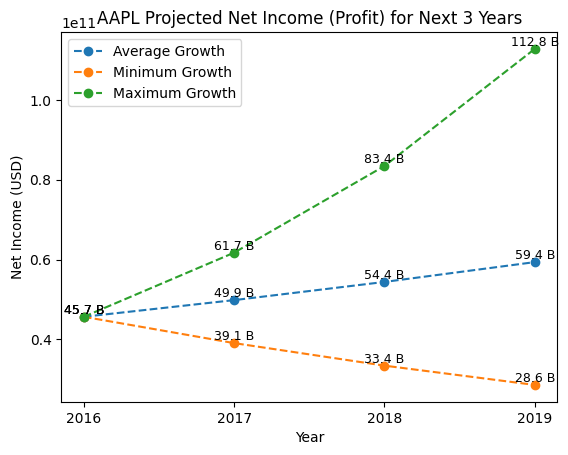

In [ ]:
import matplotlib.pyplot as plt
AAPL_df = pd.DataFrame({"Year":[2016,2017,2018,2019],"Net Income (Average Growth)":[4.568700e+10, 49857217986, 54408085129, 59374346323],
                        "Net Income (Minimum Growth)": [4.568700e+10,39092447046, 33449765054, 28621559066],
                        "Net Income (Maximum Growth)": [4.568700e+10,61741640235, 83437961321, 112758478120]})
import matplotlib.pyplot as plt

ax = AAPL_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Average Growth)",
    style="o--",
    label="Average Growth"
)

AAPL_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Minimum Growth)",
    style="o--",
    ax=ax,
    label="Minimum Growth"
)

AAPL_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Maximum Growth)",
    style="o--",
    ax=ax,
    label="Maximum Growth"
)

# Add point labels
for col in [
    "Net Income (Average Growth)",
    "Net Income (Minimum Growth)",
    "Net Income (Maximum Growth)"
]:
    for x, y in zip(AAPL_df["Year"], AAPL_df[col]):
        ax.text(
            x, y,
            f"{y/1e9:.1f} B",   # format in billions
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.xlabel("Year")
plt.ylabel("Net Income (USD)")
plt.title("AAPL Projected Net Income (Profit) for Next 3 Years")
plt.xticks(AAPL_df["Year"])
plt.legend()
plt.show()


In [ ]:
avg_forecast = forecast(2.444200e+10, 0.060044)
min_forecast = forecast(2.444200e+10,-0.159650)
max_forecast = forecast(2.444200e+10,0.215755)
print(avg_forecast)
print(min_forecast)
print(max_forecast)

[25909595448.0, 27465311197.079712, 29114438342.597168]
[20539834700.0, 17260650090.145, 14504987303.253353]
[29715483709.999996, 36126747897.85104, 43921274390.551895]


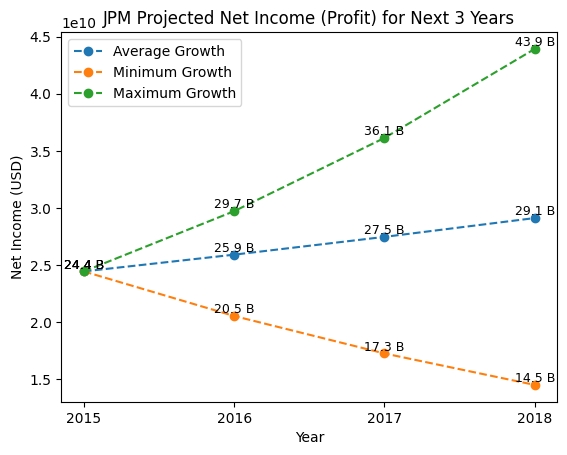

In [ ]:
import matplotlib.pyplot as plt
JPM_df = pd.DataFrame({"Year":[2015,2016,2017,2018],"Net Income (Average Growth)":[2.444200e+10,round(avg_forecast[0],0),round(avg_forecast[1],0),round(avg_forecast[2],0)],
                        "Net Income (Minimum Growth)": [2.444200e+10,round(min_forecast[0],0),round(min_forecast[1],0),round(min_forecast[2],0)],
                        "Net Income (Maximum Growth)": [2.444200e+10,round(max_forecast[0],0), round(max_forecast[1],0),round(max_forecast[2],0)]})
import matplotlib.pyplot as plt

ax = JPM_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Average Growth)",
    style="o--",
    label="Average Growth"
)

JPM_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Minimum Growth)",
    style="o--",
    ax=ax,
    label="Minimum Growth"
)

JPM_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Maximum Growth)",
    style="o--",
    ax=ax,
    label="Maximum Growth"
)

# Add point labels
for col in [
    "Net Income (Average Growth)",
    "Net Income (Minimum Growth)",
    "Net Income (Maximum Growth)"
]:
    for x, y in zip(JPM_df["Year"], JPM_df[col]):
        ax.text(
            x, y,
            f"{y/1e9:.1f} B",   # format in billions
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.xlabel("Year")
plt.ylabel("Net Income (USD)")
plt.title("JPM Projected Net Income (Profit) for Next 3 Years")
plt.xticks(JPM_df["Year"])
plt.legend()
plt.show()

In [ ]:
avg_forecast = forecast(2.289400e+10,0.068190)
min_forecast = forecast(2.289400e+10,-0.007069)
max_forecast = forecast(2.289400e+10,0.157750)
print(avg_forecast)
print(min_forecast)
print(max_forecast)

[24455141860.0, 26122737983.4334, 27904047486.52372]
[22732162314.0, 22571468658.602333, 22411910946.654675]
[26505528500.0, 30686775620.875004, 35527614475.06804]


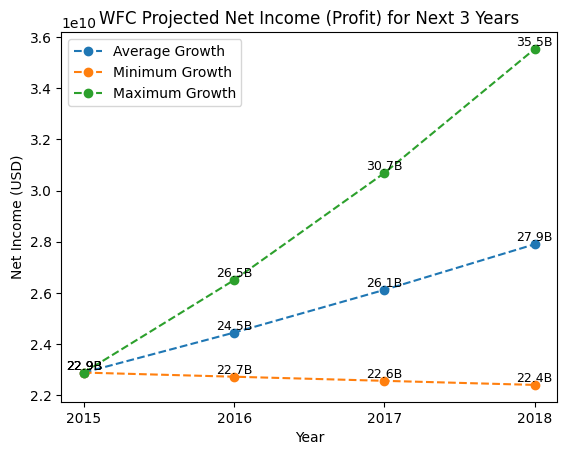

In [ ]:
import matplotlib.pyplot as plt
WFC_df = pd.DataFrame({"Year":[2015,2016,2017,2018],"Net Income (Average Growth)":[2.289400e+10,round(avg_forecast[0],0),round(avg_forecast[1],0),round(avg_forecast[2],0)],
                        "Net Income (Minimum Growth)": [2.289400e+10,round(min_forecast[0],0),round(min_forecast[1],0),round(min_forecast[2],0)],
                        "Net Income (Maximum Growth)": [2.289400e+10,round(max_forecast[0],0), round(max_forecast[1],0),round(max_forecast[2],0)]})
import matplotlib.pyplot as plt

ax = WFC_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Average Growth)",
    style="o--",
    label="Average Growth"
)

WFC_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Minimum Growth)",
    style="o--",
    ax=ax,
    label="Minimum Growth"
)

WFC_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Maximum Growth)",
    style="o--",
    ax=ax,
    label="Maximum Growth"
)

# Add point labels
for col in [
    "Net Income (Average Growth)",
    "Net Income (Minimum Growth)",
    "Net Income (Maximum Growth)"
]:
    for x, y in zip(WFC_df["Year"], WFC_df[col]):
        ax.text(
            x, y,
            f"{y/1e9:.1f}B",   # format in billions
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.xlabel("Year")
plt.ylabel("Net Income (USD)")
plt.title("WFC Projected Net Income (Profit) for Next 3 Years")
plt.xticks(WFC_df["Year"])
plt.legend()
plt.show()

In [ ]:
avg_forecast = forecast(1.787900e+10,4.278054)
min_forecast = forecast(1.787900e+10,-0.162825)
max_forecast = forecast(1.787900e+10,12.139429)
print(avg_forecast)
print(min_forecast)
print(max_forecast)

[94366327466.0, 498070572147.2312, 2628843375603.982]
[14967851825.0, 12530711351.594376, 10490398275.77102]
[234919851091.0, 3086712704100.767, 40557642418930.03]


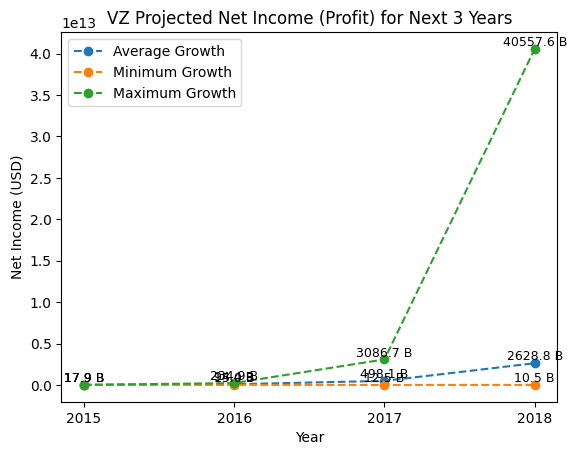

In [ ]:
import matplotlib.pyplot as plt
VZ_df = pd.DataFrame({"Year":[2015,2016,2017,2018],"Net Income (Average Growth)":[1.787900e+10,round(avg_forecast[0],0),round(avg_forecast[1],0),round(avg_forecast[2],0)],
                        "Net Income (Minimum Growth)": [1.787900e+10,round(min_forecast[0],0),round(min_forecast[1],0),round(min_forecast[2],0)],
                        "Net Income (Maximum Growth)": [1.787900e+10,round(max_forecast[0],0), round(max_forecast[1],0),round(max_forecast[2],0)]})
import matplotlib.pyplot as plt

ax = VZ_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Average Growth)",
    style="o--",
    label="Average Growth"
)

VZ_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Minimum Growth)",
    style="o--",
    ax=ax,
    label="Minimum Growth"
)

VZ_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Maximum Growth)",
    style="o--",
    ax=ax,
    label="Maximum Growth"
)

# Add point labels
for col in [
    "Net Income (Average Growth)",
    "Net Income (Minimum Growth)",
    "Net Income (Maximum Growth)"
]:
    for x, y in zip(VZ_df["Year"], VZ_df[col]):
        ax.text(
            x, y,
            f"{y/1e9:.1f} B",   # format in billions
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.xlabel("Year")
plt.ylabel("Net Income (USD)")
plt.title("VZ Projected Net Income (Profit) for Next 3 Years")
plt.xticks(VZ_df["Year"])
plt.legend()
plt.show()

In [ ]:
avg_forecast = forecast(1.724200e+10,0.568388)
min_forecast = forecast(1.724200e+10,-0.464822)
max_forecast = forecast(1.724200e+10,1.358687)
print(avg_forecast)
print(min_forecast)
print(max_forecast)

[27042145896.000004, 42412577117.53565, 66519377000.217514]
[9227539075.999998, 4938375907.615527, 2642910141.4858623]
[40668481253.99999, 95924218043.55348, 226255206084.495]


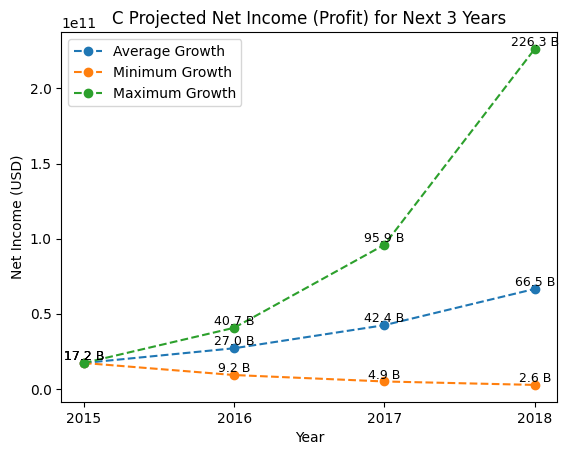

In [ ]:
import matplotlib.pyplot as plt
C_df = pd.DataFrame({"Year":[2015,2016,2017,2018],"Net Income (Average Growth)":[1.724200e+10,round(avg_forecast[0],0),round(avg_forecast[1],0),round(avg_forecast[2],0)],
                        "Net Income (Minimum Growth)": [1.724200e+10,round(min_forecast[0],0),round(min_forecast[1],0),round(min_forecast[2],0)],
                        "Net Income (Maximum Growth)": [1.724200e+10,round(max_forecast[0],0), round(max_forecast[1],0),round(max_forecast[2],0)]})
import matplotlib.pyplot as plt

ax = C_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Average Growth)",
    style="o--",
    label="Average Growth"
)

C_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Minimum Growth)",
    style="o--",
    ax=ax,
    label="Minimum Growth"
)

C_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Maximum Growth)",
    style="o--",
    ax=ax,
    label="Maximum Growth"
)

# Add point labels
for col in [
    "Net Income (Average Growth)",
    "Net Income (Minimum Growth)",
    "Net Income (Maximum Growth)"
]:
    for x, y in zip(C_df["Year"], C_df[col]):
        ax.text(
            x, y,
            f"{y/1e9:.1f} B",   # format in billions
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.xlabel("Year")
plt.ylabel("Net Income (USD)")
plt.title("C Projected Net Income (Profit) for Next 3 Years")
plt.xticks(C_df["Year"])
plt.legend()
plt.show()

In [ ]:
avg_forecast = forecast(1.588800e+10,1.146554)
min_forecast = forecast(1.588800e+10,-0.577202)
max_forecast = forecast(1.588800e+10,2.287399)
print(avg_forecast)
print(min_forecast)
print(max_forecast)

[34104449952.0, 73207043462.26541, 157142871972.0997]
[6717414624.0, 2840109468.1979523, 1200792602.9351578]
[52230195312.0, 171701491838.47348, 564451312568.306]


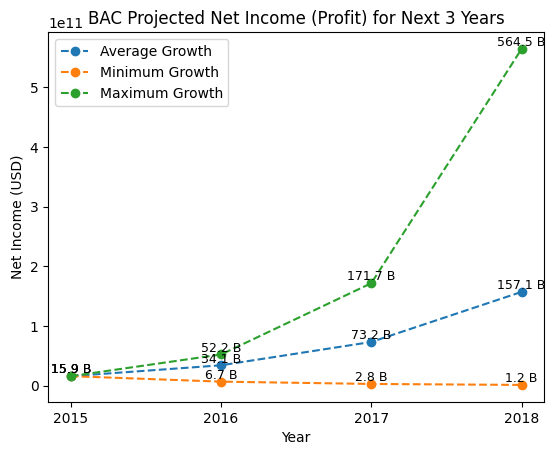

In [ ]:
import matplotlib.pyplot as plt
BAC_df = pd.DataFrame({"Year":[2015,2016,2017,2018],"Net Income (Average Growth)":[1.588800e+10,round(avg_forecast[0],0),round(avg_forecast[1],0),round(avg_forecast[2],0)],
                        "Net Income (Minimum Growth)": [1.588800e+10,round(min_forecast[0],0),round(min_forecast[1],0),round(min_forecast[2],0)],
                        "Net Income (Maximum Growth)": [1.588800e+10,round(max_forecast[0],0), round(max_forecast[1],0),round(max_forecast[2],0)]})
import matplotlib.pyplot as plt

ax = BAC_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Average Growth)",
    style="o--",
    label="Average Growth"
)

BAC_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Minimum Growth)",
    style="o--",
    ax=ax,
    label="Minimum Growth"
)

BAC_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Maximum Growth)",
    style="o--",
    ax=ax,
    label="Maximum Growth"
)

# Add point labels
for col in [
    "Net Income (Average Growth)",
    "Net Income (Minimum Growth)",
    "Net Income (Maximum Growth)"
]:
    for x, y in zip(BAC_df["Year"], BAC_df[col]):
        ax.text(
            x, y,
            f"{y/1e9:.1f} B",   # format in billions
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.xlabel("Year")
plt.ylabel("Net Income (USD)")
plt.title("BAC Projected Net Income (Profit) for Next 3 Years")
plt.xticks(BAC_df["Year"])
plt.legend()
plt.show()

In [ ]:
avg_forecast = forecast(1.334500e+10,0.652282)
min_forecast = forecast(1.334500e+10,-0.650233)
max_forecast = forecast(1.334500e+10,1.535518)
print(avg_forecast)
print(min_forecast)
print(max_forecast)

[22049703290.0, 36432327851.40778, 60196479526.97976]
[4667640615.000001, 1632586654.9867053, 571024936.5547351]
[33836487709.999996, 85793023645.48376, 217529755727.54968]


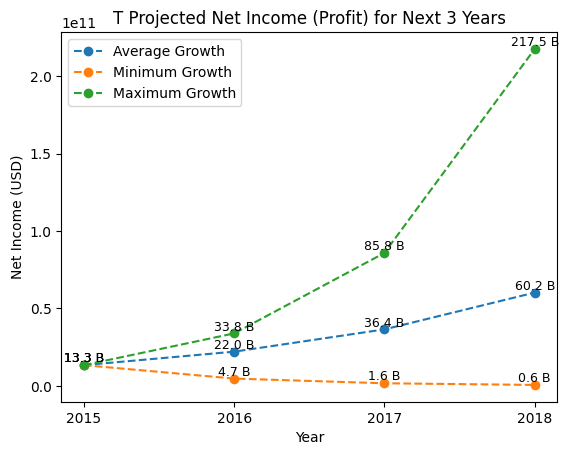

In [ ]:
import matplotlib.pyplot as plt
T_df = pd.DataFrame({"Year":[2015,2016,2017,2018],"Net Income (Average Growth)":[1.334500e+10,round(avg_forecast[0],0),round(avg_forecast[1],0),round(avg_forecast[2],0)],
                        "Net Income (Minimum Growth)": [1.334500e+10,round(min_forecast[0],0),round(min_forecast[1],0),round(min_forecast[2],0)],
                        "Net Income (Maximum Growth)": [1.334500e+10,round(max_forecast[0],0), round(max_forecast[1],0),round(max_forecast[2],0)]})
import matplotlib.pyplot as plt

ax = T_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Average Growth)",
    style="o--",
    label="Average Growth"
)

T_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Minimum Growth)",
    style="o--",
    ax=ax,
    label="Minimum Growth"
)

T_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Maximum Growth)",
    style="o--",
    ax=ax,
    label="Maximum Growth"
)

# Add point labels
for col in [
    "Net Income (Average Growth)",
    "Net Income (Minimum Growth)",
    "Net Income (Maximum Growth)"
]:
    for x, y in zip(T_df["Year"], T_df[col]):
        ax.text(
            x, y,
            f"{y/1e9:.1f} B",   # format in billions
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.xlabel("Year")
plt.ylabel("Net Income (USD)")
plt.title("T Projected Net Income (Profit) for Next 3 Years")
plt.xticks(T_df["Year"])
plt.legend()
plt.show()

In [ ]:
avg_forecast = forecast(1.073900e+10, 0.042008)
min_forecast = forecast(1.073900e+10, -0.213363)
max_forecast = forecast(1.073900e+10,0.195747)
print(avg_forecast)
print(min_forecast)
print(max_forecast)

[11190123912.0, 11660198637.295298, 12150020261.650797]
[8447694743.0, 6645269249.549292, 5227414666.657706]
[12841127032.999998, 15354739126.328648, 18360383246.0901]


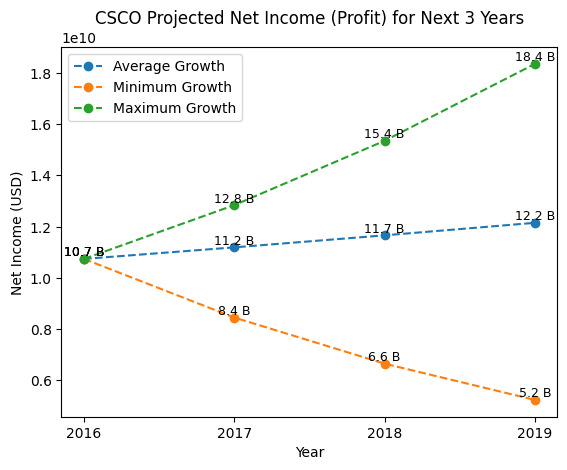

In [ ]:
import matplotlib.pyplot as plt
CSCO_df = pd.DataFrame({"Year":[2016,2017,2018,2019],"Net Income (Average Growth)":[1.073900e+10,round(avg_forecast[0],0),round(avg_forecast[1],0),round(avg_forecast[2],0)],
                        "Net Income (Minimum Growth)": [1.073900e+10,round(min_forecast[0],0),round(min_forecast[1],0),round(min_forecast[2],0)],
                        "Net Income (Maximum Growth)": [1.073900e+10,round(max_forecast[0],0), round(max_forecast[1],0),round(max_forecast[2],0)]})
import matplotlib.pyplot as plt

ax = CSCO_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Average Growth)",
    style="o--",
    label="Average Growth"
)

CSCO_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Minimum Growth)",
    style="o--",
    ax=ax,
    label="Minimum Growth"
)

CSCO_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Maximum Growth)",
    style="o--",
    ax=ax,
    label="Maximum Growth"
)

# Add point labels
for col in [
    "Net Income (Average Growth)",
    "Net Income (Minimum Growth)",
    "Net Income (Maximum Growth)"
]:
    for x, y in zip(CSCO_df["Year"], CSCO_df[col]):
        ax.text(
            x, y,
            f"{y/1e9:.1f} B",   # format in billions
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.xlabel("Year")
plt.ylabel("Net Income (USD)")
plt.title("CSCO Projected Net Income (Profit) for Next 3 Years")
plt.xticks(CSCO_df["Year"])
plt.legend()
plt.show()

In [ ]:
avg_forecast = forecast(1.031600e+10,0.031898)
min_forecast = forecast(1.031600e+10,-0.096673)
max_forecast = forecast(1.031600e+10,0.216632)
print(avg_forecast)
print(min_forecast)
print(max_forecast)

[10645059768.0, 10984615884.479662, 11335003161.962795]
[9318721332.0, 8417852584.671564, 7604073521.753611]
[12550775712.0, 15269675356.041983, 18577575667.772068]


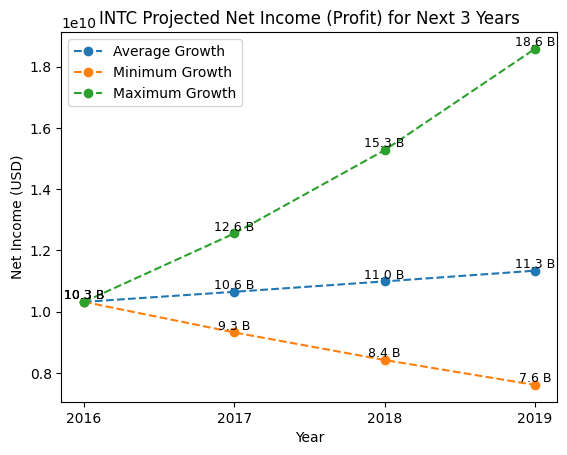

In [ ]:
import matplotlib.pyplot as plt
INTC_df = pd.DataFrame({"Year":[2016,2017,2018,2019],"Net Income (Average Growth)":[1.031600e+10,round(avg_forecast[0],0),round(avg_forecast[1],0),round(avg_forecast[2],0)],
                        "Net Income (Minimum Growth)": [1.031600e+10,round(min_forecast[0],0),round(min_forecast[1],0),round(min_forecast[2],0)],
                        "Net Income (Maximum Growth)": [1.031600e+10,round(max_forecast[0],0), round(max_forecast[1],0),round(max_forecast[2],0)]})
import matplotlib.pyplot as plt

ax = INTC_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Average Growth)",
    style="o--",
    label="Average Growth"
)

INTC_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Minimum Growth)",
    style="o--",
    ax=ax,
    label="Minimum Growth"
)

INTC_df.plot(
    kind="line",
    x="Year",
    y="Net Income (Maximum Growth)",
    style="o--",
    ax=ax,
    label="Maximum Growth"
)

# Add point labels
for col in [
    "Net Income (Average Growth)",
    "Net Income (Minimum Growth)",
    "Net Income (Maximum Growth)"
]:
    for x, y in zip(INTC_df["Year"], INTC_df[col]):
        ax.text(
            x, y,
            f"{y/1e9:.1f} B",   # format in billions
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.xlabel("Year")
plt.ylabel("Net Income (USD)")
plt.title("INTC Projected Net Income (Profit) for Next 3 Years")
plt.xticks(INTC_df["Year"])
plt.legend()
plt.show()

Create a table showing percent change to the nearest integer over the projected three year period.

In [ ]:
Table = pd.DataFrame({"Ticker":["APPL","JPM","WFC","VZ","C","BAC","T","CSCO","INTC"],
                      "Percent Change (Average)":[23.06, 19.26,21.83,14586.03,286.63,888.05,352.63,14.02,9.71],
                      "Percent Change (Minimum)": [-37.42,-40.57,-2.18,-41.34,-84.88,-92.45,-95.49,-51.40,-26.21],
                      "Percent Change (Maximum)" : [146.83,79.92,55.02,226478.77,1215.70,3450.31,1535.34,69.16,80.58]})
Table

,Ticker,Percent Change (Average),Percent Change (Minimum),Percent Change (Maximum)
0,APPL,23.06,-37.42,146.83
1,JPM,19.26,-40.57,79.92
2,WFC,21.83,-2.18,55.02
3,VZ,14586.03,-41.34,226478.77
4,C,286.63,-84.88,1215.70
5,BAC,888.05,-92.45,3450.31
6,T,352.63,-95.49,1535.34
7,CSCO,14.02,-51.40,69.16
8,INTC,9.71,-26.21,80.58


## Key Findings and Conclusion

High-growth (optimistic) scenario:
Based on maximum projected growth, Verizon (VZ), Bank of America (BAC), and AT&T (T) emerge as the top-performing companies. These firms offer the strongest upside potential under favorable conditions.

Average growth scenario:
The rankings remain consistent under average projections, indicating relatively stable performance across expected market conditions.

Downside risk (pessimistic) scenario:
AT&T (T), Bank of America (BAC), and Citigroup (C) show the weakest minimum growth projections, suggesting higher downside risk during unfavorable market conditions.

Investment Interpretation:
Investors seeking maximum potential returns may favor Verizon, which performs strongly across optimistic and average projections.

More risk-averse investors may prefer Wells Fargo, which exhibits the strongest pessimistic projection while maintaining competitive average and optimistic outcomes.


